Azis Muslim
- FTDS Batch 013
- MILESTONE 2 PHASE 2
- DATASET : COVID TWEET DATASET

# Sentimenet Analysis For Coronavirus Tweet Dataset

## Background

Coronavirus had been such as hot potato since the first time it showed up in Wuhan 2020. Afterwards it spreaded over across the world and had caused many problems regreding healthcare, economics, and many more. In this research we were trying to do sentiment analysis from twitter where people across the worlds usually use to state complain, share happines, share advices, giving suppports on each other and so on.

## Problems

When we were doing classfication mostly we dealt with missclassification and missclassification data might lead the reader got mislead about the output. In this research we would like to break down that problem with two deep learning models.

## Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('mode.chained_assignment', None)
palette=sns.color_palette('magma')
sns.set(palette=palette)
!pip install -q pysastrawi
import nltk
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
nltk.download('stopwords')
nltk.download('punkt')
#Preprocessing the tweets
import string
import re
stopwords = nltk.corpus.stopwords.words('english')
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Embedding, SpatialDropout1D
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import sys
from xarray import corr
from sklearn.preprocessing import PolynomialFeatures
from matplotlib.pyplot import *
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.layers import Dense, GlobalAveragePooling1D, Input, LSTM, GRU
from tensorflow.keras.models import Model, Sequential
from wordcloud import WordCloud
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
import tensorflow as tf
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from tensorflow.keras.layers import TextVectorization, Embedding
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout,Bidirectional
import json
import requests

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Before we run the code below we would like to make sure the file of kaggle.jason has been inserted in content folder so there will be no obstacles to download the dataset directly from kaggle

In [ ]:
# Step 2 : Install Kaggle library in Google Collaboratory.

## Install Kaggle library
!pip install kaggle

## Make a directory named `.kaggle` 
!mkdir ~/.kaggle

## Copy the kaggle.json into this new directory 
!cp kaggle.json ~/.kaggle/

## Change permission for this directory : 
!chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d datatattle/covid-19-nlp-text-classification

covid-19-nlp-text-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
%%time 
# Step 3 : Download Dataset
# Source dataset : https://www.kaggle.com/datasets/datatattle/covid-19-nlp-text-classification
!kaggle datasets download -d datatattle/covid-19-nlp-text-classification

covid-19-nlp-text-classification.zip: Skipping, found more recently modified local copy (use --force to force download)
CPU times: user 9.27 ms, sys: 38.3 ms, total: 47.6 ms
Wall time: 975 ms


In [ ]:
!unzip -q /content/covid-19-nlp-text-classification.zip -d images

replace images/Corona_NLP_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
replace images/Corona_NLP_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

### Loading Dataset

In [ ]:
train=pd.read_csv('/content/images/Corona_NLP_train.csv',encoding='ISO-8859-1')
train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
Xtrain=pd.read_csv('/content/images/Corona_NLP_train.csv',encoding='ISO-8859-1')

In [ ]:
X_train1=pd.read_csv('/content/images/Corona_NLP_train.csv',encoding='ISO-8859-1')

In [ ]:
test=pd.read_csv('/content/images/Corona_NLP_test.csv')
test.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [ ]:
Xtest=pd.read_csv('/content/images/Corona_NLP_test.csv')

In [ ]:
X_test1=pd.read_csv('/content/images/Corona_NLP_test.csv')

In [ ]:
data = pd.read_csv("/content/images/Corona_NLP_test.csv")
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.OriginalTweet, data.Sentiment, test_size=0.25, random_state=46, stratify=data.Sentiment)

In [ ]:
Vectorize = CountVectorizer()

In [ ]:
X_train_vec = Vectorize.fit_transform(X_train)
X_test_vec = Vectorize.transform(X_test)

X_train_vec

<2848x11371 sparse matrix of type '<class 'numpy.int64'>'
	with 84543 stored elements in Compressed Sparse Row format>

In [ ]:
train.shape,test.shape

((41157, 6), (3798, 6))

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


In [ ]:
train.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [ ]:
test.isnull().sum()

UserName           0
ScreenName         0
Location         834
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

In [ ]:
X_train.loc[4]

'#toiletpaper #dunnypaper #coronavirus #coronavirusaustralia #CoronaVirusUpdate #Covid_19 #9News  #Corvid19 #7NewsMelb #dunnypapergate #Costco    One week everyone buying baby milk powder the next everyone buying up toilet paper. https://t.co/ScZryVvsIh'

In [ ]:
X_train.iloc[4]

'Working in the grocery store really is a crazy right now. It is reccomended to keep a decent distance to prevent spreading #Covid_19 but this is how customers are talking to me today:\r\r\n#coronapocalypse #CoronaVirusUpdates #toiletpaper https://t.co/yIAmuMqgiS'

In [ ]:
Vectorize.get_feature_names()[1326]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


'belgiumlockdown'

In [ ]:
Vectorize.vocabulary_.keys()

dict_keys(['local', 'media', 'in', 'naples', 'reported', 'that', 'seria', 'football', 'players', 'callejon', 'llorente', 'and', 'ospinta', 'were', 'among', 'the', 'people', 'queuing', 'outside', 'supermarket', 'last', 'night', 'to', 'stock', 'up', 'on', 'food', 'during', 'coronavirus', 'emergency', 'with', 'covid_19', 'doom', 'are', 'ar', '15', 'prices', 'going', 'down', 'if', 'all', 'see', 'deals', 'lmk', 'it', 'saddens', 'me', 'so', 'stupid', 'against', 'advice', 'of', 'gatherings', 'packed', 'out', 'stores', 'amp', 'emptied', 'shelves', 'instead', 'listening', 'balanced', 'informed', 'limit', 'travel', 'interactions', 'will', 'pass', 'no', 'need', 'for', 'panic', 'buying', 'https', 'co', 'q0zbgss0rp', 'interesting', 'some', 'more', 'shocking', 'images', 'come', 'current', 'atmosphere', 'those', 'empty', 'grocery', 'store', 'working', 'really', 'is', 'crazy', 'right', 'now', 'reccomended', 'keep', 'decent', 'distance', 'prevent', 'spreading', 'but', 'this', 'how', 'customers', 'talki

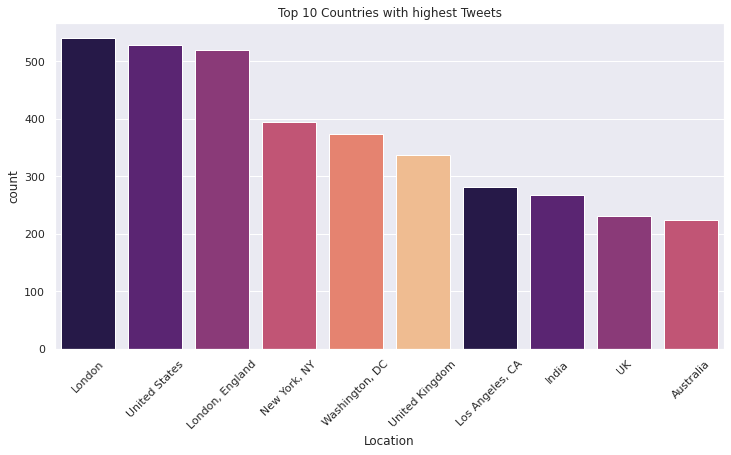

In [ ]:
#Top 10 Countries that had the highest tweets
plt.figure(figsize=(12,6))
plt.title('Top 10 Countries with highest Tweets')
countries =sns.countplot(x='Location', data=train, order=train['Location'].value_counts().index[:10], palette=palette)
countries.set_xticklabels(countries.get_xticklabels(), rotation=45)
plt.show() 

The colorful barplots above were talking about the highest tweets in ten places across the world. By looking at the graps above we can describe the highest to the lowest tweets. Countries like London, United States, England, New York, Washington DC, United Kingdom, Los Angeles, India, UK, and Australia were classified as the top ten of highest tweet respectively.

In [ ]:
# covert TweetAt to timestamp features
train["timestamp"] = pd.to_datetime(train["TweetAt"],format="%d-%m-%Y")

In [ ]:
# time based feature
Xtrain["weekday"] = train["timestamp"].dt.weekday
Xtrain["year"] = train["timestamp"].dt.year
train["month"] = train["timestamp"].dt.month
train["dayofmonth"] = train["timestamp"].dt.day

In [ ]:
data = train.groupby(["dayofmonth","Sentiment"])["UserName"].count()
days = sorted(train["dayofmonth"].unique())
sentiments = sorted(train["Sentiment"].unique())
y = [[data[day][sentiment] for sentiment in sentiments] for day in days]

Text(0, 0.5, 'amount')

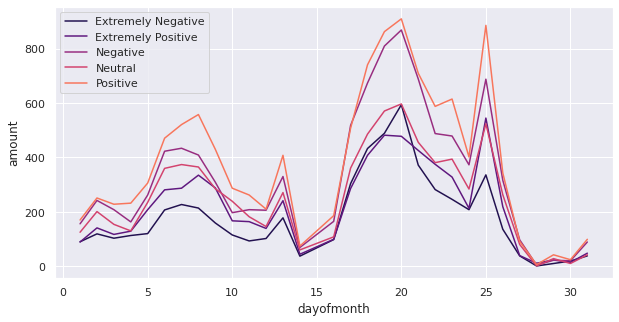

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(days,np.array(y))
plt.legend(sentiments)
plt.xlabel("dayofmonth")
plt.ylabel("amount")

The graphs above were representing the fluctuations of covid sentiments in thirty days. By analyzing deep into the graph we can easily notice that the positve sentiments which represented by the orange graph was hitting the peak two times in a month, firstly in the day of 20s and the second one was in the day of 25th. In addition all of the lines were shaping the same pattern.

In [ ]:
train.drop(columns=['TweetAt','UserName','ScreenName','Location'],axis=1,inplace=True)
test.drop(columns=['TweetAt','UserName','ScreenName','Location'],axis=1,inplace=True)

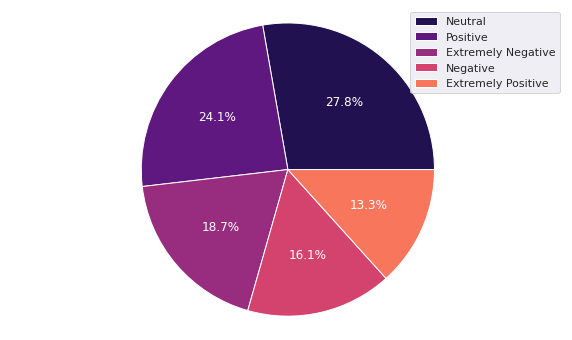

In [ ]:
#Pie Chart for the Sentiments Percentage 
plt.figure(figsize=(10,6))
plt.pie(train['Sentiment'].value_counts(), labels=train['Sentiment'].unique(), autopct='%.1f%%', textprops={'color':"w"})
plt.legend(loc='upper right')
plt.axis('equal')
plt.show()

The pie chart above gave the information that Neutral, Positive, Extremely Negative, Negative and Extremely Positive had 27.8%, 24.1%, 18.7%, 16.1%, 13.3% sentiments percentage repectively.Furthermore the Neutral sentimens had the highest proportions amongs the others.

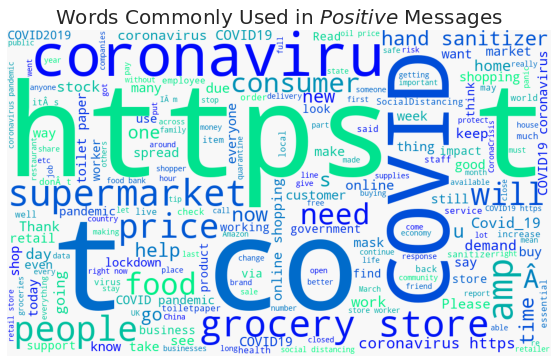

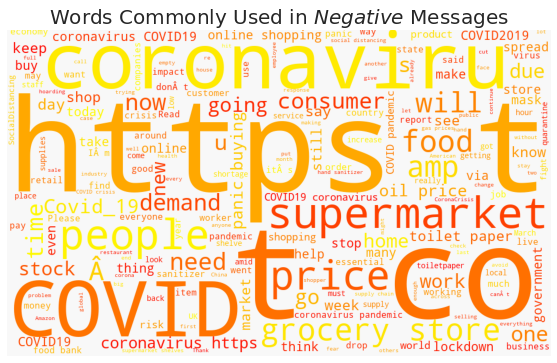

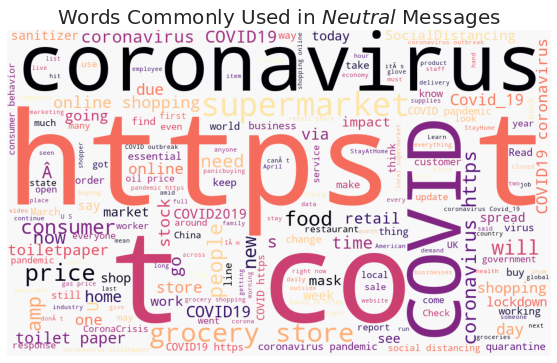

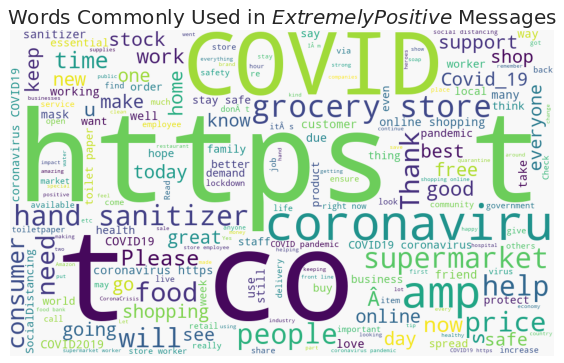

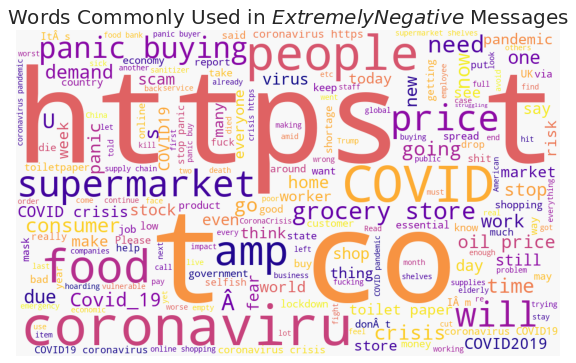

In [ ]:
#WordCloud for the Sentiments

for label, cmap in zip(['Positive', 'Negative', 'Neutral', 'Extremely Positive', 'Extremely Negative'],
                       ['winter', 'autumn', 'magma', 'viridis', 'plasma']):
    text = train.query('Sentiment == @label')['OriginalTweet'].str.cat(sep=' ')
    plt.figure(figsize=(10, 6))
    wc = WordCloud(width=1000, height=600, background_color="#f8f8f8", colormap=cmap)
    wc.generate_from_text(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"Words Commonly Used in ${label}$ Messages", size=20)
    plt.show()

- Word Clouds above was a visualization technique for text data wherein each word was picturized with its importance in the context or its frequency. Word Clouds was built to meet the humans needs when they were about to take or extract importance words from an article, novel, news paper and so forth. 

- The fist label in this word clouds was positive and it represented by winter color. Furthermore when we see it carefully we can easily get informed that the most frequent words in postive label were https, COVID, and Coronavirus. The feed back what we got was even in the positive label people tend to talk about Coronavirus

- The second label was representing negative label and the word clouds showed the same for three most frequent words but in this label price and supermarket appeard in a bigger size than what was in the positive label.  

-  The third label was talking about extremely positive label and word clouds above told us the same information for the two most frequent words like in the previous word clouds but in this label hand sanitizer showed up. 

- The fourth label wrapped up all of the words that were in extremely negatives label and from this last word cloud label appeared some of new words that did not appear before such as panic buying and oil price.

In [ ]:
train.isnull().sum()

OriginalTweet    0
Sentiment        0
timestamp        0
month            0
dayofmonth       0
dtype: int64

In [ ]:
test.isnull().sum()

OriginalTweet    0
Sentiment        0
dtype: int64

In [ ]:
train

,OriginalTweet,Sentiment,timestamp,month,dayofmonth
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,2020-03-16,3,16
1,advice Talk to your neighbours family to excha...,Positive,2020-03-16,3,16
2,Coronavirus Australia: Woolworths to give elde...,Positive,2020-03-16,3,16
3,My food stock is not the only one which is emp...,Positive,2020-03-16,3,16
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,2020-03-16,3,16
...,...,...,...,...,...
41152,Airline pilots offering to stock supermarket s...,Neutral,2020-04-14,4,14
41153,Response to complaint not provided citing COVI...,Extremely Negative,2020-04-14,4,14
41154,You know itÂs getting tough when @KameronWild...,Positive,2020-04-14,4,14
41155,Is it wrong that the smell of hand sanitizer i...,Neutral,2020-04-14,4,14


From the dataset above we know that our dataset was consisted from 41157 rows and 5 columns.

In [ ]:
train.rename(columns={'OriginalTweet':'Tweet'},inplace=True)
test.rename(columns={'OriginalTweet':'Tweet'},inplace=True)

In [ ]:
train['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [ ]:
test['Sentiment'].value_counts()

Negative              1041
Positive               947
Neutral                619
Extremely Positive     599
Extremely Negative     592
Name: Sentiment, dtype: int64

In [ ]:
train.Sentiment.replace({'Extremely Positive': 'Positive','Extremely Negative': 'Negative'},inplace=True)
test.Sentiment.replace({'Extremely Positive': 'Positive','Extremely Negative': 'Negative'},inplace=True)

In [ ]:
train['Sentiment'].value_counts(normalize=True)*100

Positive    43.846733
Negative    37.412834
Neutral     18.740433
Name: Sentiment, dtype: float64

In [ ]:
test['Sentiment'].value_counts(normalize=True)*100

Negative    42.996314
Positive    40.705635
Neutral     16.298052
Name: Sentiment, dtype: float64

The code below was telling the process of encoding the label to be more readable for the computer. In this part regative was labeled as 0 Neutral was labeled as 1 and Positive as labeled as 2.

In [ ]:
#mapping of sentiment values
train.replace({'Negative':0,'Neutral':1,'Positive':2},inplace=True)
test.replace({'Negative':0,'Neutral':1,'Positive':2},inplace=True)

In [ ]:
train=train.drop_duplicates()
test=test.drop_duplicates()

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Lemmatization works by transforming the words in the corpus to be based words that can still be discerned by humans. For instances built or building could be referred back to build as the basic word.

In [ ]:
#for lemmatization
lemma=WordNetLemmatizer()
#function for preprocessing
def preprocessing(review_text):
    review_text=re.sub(r'http\S+',' ',review_text) #removing the url or numbers with \D+ or \S+
    review_text=re.sub('[^a-z-A-Z]',' ',review_text) #removing numbers and punctuation
    review_text=str(review_text).lower()   #converting all characters into lowercase
    review_text=review_text.split()
    review_text=" ".join([lemma.lemmatize(item) for item in review_text 
                 if item not in set(stopwords.words('english'))]) #removing stopwords
    return review_text

In [ ]:
positive=train[train.Sentiment==2]['Tweet']
negative=train[train.Sentiment==0]['Tweet']
neutral=train[train.Sentiment==1]['Tweet']

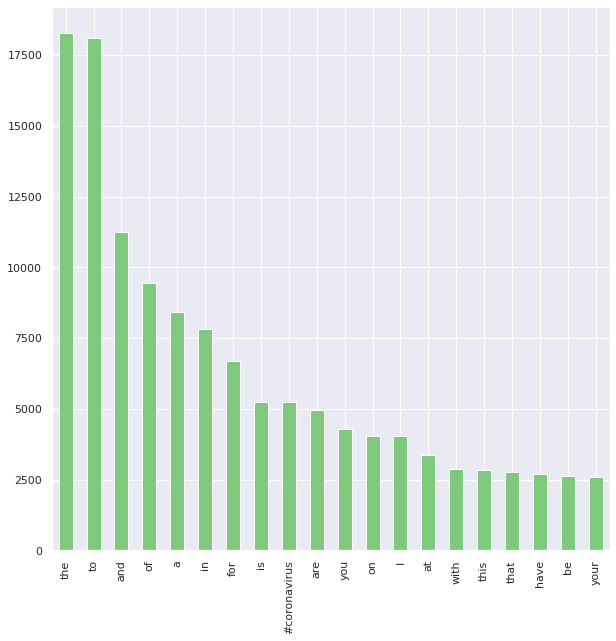

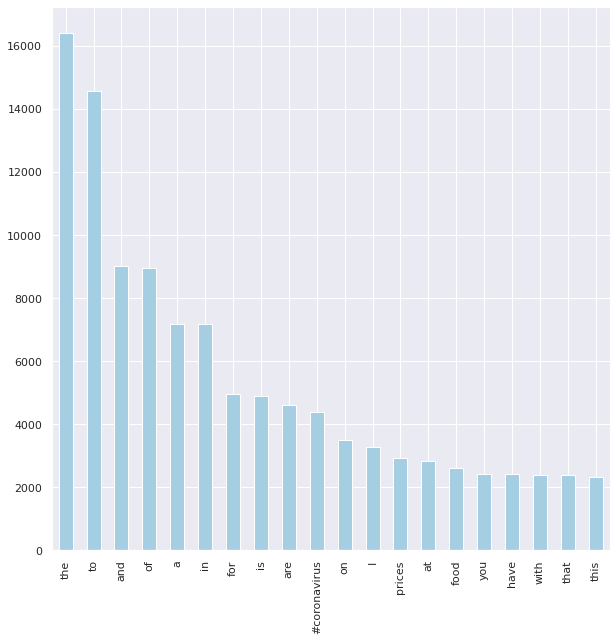

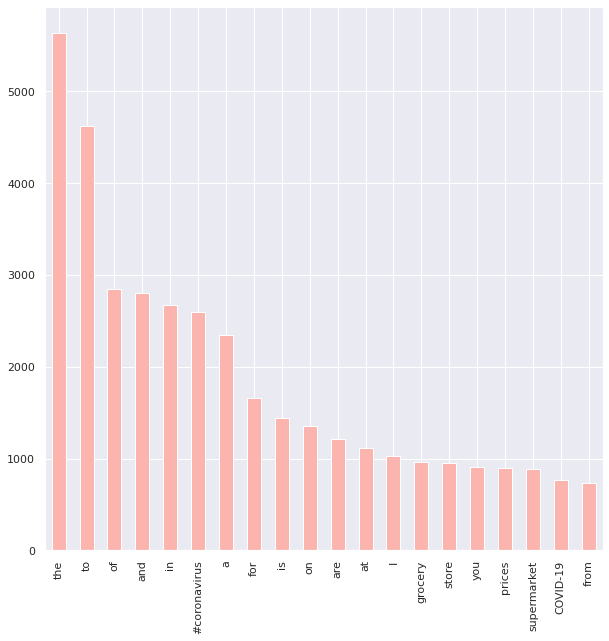

In [ ]:
#displaying top 20 words having highest frequency amongst all three classes
color=['Accent','Paired','Pastel1']
splitedData=[positive,negative,neutral]

for item in range(3):
    plt.figure(figsize=(10,10))
    pd.Series(' '.join([i for i in splitedData[item]]).split()).value_counts().head(20).plot(kind='bar',
                                                                                             colormap=color[item])

- The three bar plots above were talking about the top twenties frequent words mentioned on each classes. 

- The first class was positive class with green barplot and in general it showed that most of the words in the bar plots were stop words like the, to, and, of, a in, for, is, are and it was only in the tenth bar plot the non stop words was spotted on.

- The second class was negative class which represented by the blue bar plots. The top of most frequent words were the same like in positive classes in general but the rate composition for each words were little bit different. The easiest way to find it out were on the bar plots of words "and" and "of" because those plots had the same height and it was little bit different with same bar plots of words in the positive class which the plots of the words "and" and "of" were having different type height.

-  The third class was neutral class and in this class "#coronavirus" was in the sixth place. That was totally different compared to the positive and negative class where "#coronavirus" was placed in the nineth and tenth respectively.

In [ ]:
x_train=train['Tweet']
y_train=train['Sentiment']
x_test=test['Tweet']
y_test=test['Sentiment']

In [ ]:
max_len = np.max(x_train.apply(lambda x :len(x)))
max_len

355

- The NLP datasets consisted with bunch of words and the computer could not be able to process it unless it were decoded into numbers.

- In this part the encoding filed will be handled by tokenizing the words. The idea of tokenizing was adapted from the NLP itself because we don't want to get misslead of the repetition words and the importance words.

In [ ]:
#converting text to numeric using tokenizer with padding sequences to max length
tokenizer=Tokenizer()
tokenizer.fit_on_texts(x_train)
vocab_length = len(tokenizer.word_index) + 1

x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

x_train = pad_sequences(x_train, maxlen=max_len, padding='post')
x_test = pad_sequences(x_test, maxlen=max_len, padding='post')

In [ ]:
print("Vocab length:", vocab_length)
print("Max sequence length:", max_len)

Vocab length: 85199
Max sequence length: 355


In [ ]:
Transformer = TfidfTransformer()

X_train_tfidf = Transformer.fit_transform(X_train_vec)
X_test_tfidf = Transformer.transform(X_test_vec)

X_train_tfidf

<2848x11371 sparse matrix of type '<class 'numpy.float64'>'
	with 84543 stored elements in Compressed Sparse Row format>

In [ ]:
jml_vocab = len(Vectorize.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train])

print("Amount of Vocab:",jml_vocab)
print("Length of Max Word:",max_sen_len,"kata")

Amount of Vocab: 11371
Length of Max Word: 1 kata


In [ ]:
X_train

107     Local media in Naples reported that Seria A fo...
2734    With the #Covid_19 doom. Are AR-15 prices goin...
516     It saddens me to see that people are so stupid...
2290    Interesting that some of the more shocking ima...
2264    Working in the grocery store really is a crazy...
                              ...                        
1917    Zombie Apocalypse ????????? is here!\r\r\nBe c...
1586    Right now even wholesalers dont have stocks of...
566     plant-based foods have longer shelf lives, "al...
2096    We should demand food systems be socialized in...
3229    @Google_Comms @realDonaldTrump @vp @parscale P...
Name: OriginalTweet, Length: 2848, dtype: object

In [ ]:
text_vectorization = TextVectorization(max_tokens=jml_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape=(1,) # We need to set this up if we would like to use sequential API
                                       )

text_vectorization.adapt(X_train) #Adapt is the same like fit

In [ ]:
Xtest.OriginalTweet[0]

'TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr76pcrLWh https://t.co/ivMKMsqdT1'

In [ ]:
text_vectorization([Xtest.OriginalTweet[0]])

<tf.Tensor: shape=(1, 71), dtype=int64, numpy=
array([[ 3160,   160,  4537, 10175,   117,    41,    85,     1,  1970,
            8,  2928,  3294,    37,  1564,     1,     1,    42,     1,
          373,    21,    23,     1,     1,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0]])>

In [ ]:
text_vectorization(['i love you no matter what'])

<tf.Tensor: shape=(1, 71), dtype=int64, numpy=
array([[  13,  632,   17,   44, 1028,   62,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0]])>

In [ ]:
text_vectorization.get_vocabulary()[1]

'[UNK]'

the result of the code above as UNK and it was kind of error in NLP

In [ ]:
embedding = Embedding(input_dim=jml_vocab,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len
                      )

In [ ]:
Xtest.OriginalTweet[0]

'TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr76pcrLWh https://t.co/ivMKMsqdT1'

In [ ]:
text_vectorization([Xtest.OriginalTweet[0]])

<tf.Tensor: shape=(1, 71), dtype=int64, numpy=
array([[ 3160,   160,  4537, 10175,   117,    41,    85,     1,  1970,
            8,  2928,  3294,    37,  1564,     1,     1,    42,     1,
          373,    21,    23,     1,     1,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0]])>

In [ ]:
emb_res = embedding(text_vectorization([Xtest.OriginalTweet[0]]))
emb_res

<tf.Tensor: shape=(1, 71, 128), dtype=float32, numpy=
array([[[-0.02916159,  0.01184287,  0.03731946, ..., -0.01191552,
          0.04037328, -0.03522711],
        [ 0.02385391, -0.00557518,  0.00960128, ...,  0.00536951,
         -0.00725347, -0.00230249],
        [-0.04228231,  0.0179066 ,  0.0363894 , ...,  0.01427733,
          0.04545193,  0.0270842 ],
        ...,
        [ 0.01645621, -0.00589932, -0.01471175, ..., -0.02511839,
          0.00912381, -0.00024097],
        [ 0.01645621, -0.00589932, -0.01471175, ..., -0.02511839,
          0.00912381, -0.00024097],
        [ 0.01645621, -0.00589932, -0.01471175, ..., -0.02511839,
          0.00912381, -0.00024097]]], dtype=float32)>

In [ ]:
emb_res[0][0] #hai

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([-0.02916159,  0.01184287,  0.03731946,  0.03052572, -0.0372782 ,
       -0.01667739, -0.00559328, -0.04201837,  0.02969159, -0.03920021,
       -0.0296725 ,  0.02078089,  0.04233446,  0.03203762,  0.01298281,
        0.02405692, -0.00741136, -0.01224185, -0.02127339,  0.01000876,
        0.0145258 ,  0.03650964,  0.02414426, -0.0108027 , -0.01997007,
        0.04800376,  0.04139239,  0.04422211,  0.0288965 , -0.03229103,
        0.02471173,  0.01446887,  0.01395607, -0.00084304,  0.04462406,
       -0.00458153,  0.02741555,  0.0228841 ,  0.03593082,  0.04149241,
        0.02036985, -0.00879844,  0.02230546,  0.00030056,  0.00275451,
        0.04671537,  0.02259981,  0.03999542, -0.02694122,  0.04634812,
       -0.03796045, -0.03782802, -0.01153511, -0.03220012, -0.00719366,
       -0.00981232,  0.00786505, -0.00038228, -0.00501257,  0.03827247,
        0.03832691,  0.04119083, -0.03391715, -0.04387149, -0.01634415,
        0.015403

In [ ]:
X_train

107     Local media in Naples reported that Seria A fo...
2734    With the #Covid_19 doom. Are AR-15 prices goin...
516     It saddens me to see that people are so stupid...
2290    Interesting that some of the more shocking ima...
2264    Working in the grocery store really is a crazy...
                              ...                        
1917    Zombie Apocalypse ????????? is here!\r\r\nBe c...
1586    Right now even wholesalers dont have stocks of...
566     plant-based foods have longer shelf lives, "al...
2096    We should demand food systems be socialized in...
3229    @Google_Comms @realDonaldTrump @vp @parscale P...
Name: OriginalTweet, Length: 2848, dtype: object

### LSTM MODEL

 LSTM is actually built because the basic RNNs architecture could only remember word in the last ten neurons. LSTP was the improvement of RNNs that would tackle the problem in basic RNNs. 

LSTM is a recurrent neural network (RNN) architecture that REMEMBERS values over arbitrary intervals. LSTM is well-suited to classify, process and predict time series given time lags of unknown duration. Relative insensitivity to gap length gives an advantage to LSTM over alternative RNNs, hidden Markov models and other sequence learning methods.

In [ ]:
#making use of bidirectional LSTM without dropout
embedding_dim=20
model1 = Sequential()
model1.add(Embedding(vocab_length,embedding_dim,input_length=max_len)) #The embedding layer
model1.add(Bidirectional(LSTM(50))) #Our LSTM layer
model1.add(Dense(20,activation='relu')) # Hidden layer with 20 neurons and relu as an activation function
model1.add(Dense(3,activation='softmax')) # Output layer with 3 neurons and softmax as an acivation function 


model1.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In the model compile above we were using 'adam' as optimizer because it was the latest optimizer that was commonly used among datascientists. categorical_crossentropy was used becaused it counts the loss between labels and predictions. The last but not least accuracy was used as a metric valuation it was only to monitor the model and in the final evaluatian we were going to use not just accuracy.

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 355, 20)           1703980   
                                                                 
 bidirectional (Bidirectiona  (None, 100)              28400     
 l)                                                              
                                                                 
 dense (Dense)               (None, 20)                2020      
                                                                 
 dense_1 (Dense)             (None, 3)                 63        
                                                                 
Total params: 1,734,463
Trainable params: 1,734,463
Non-trainable params: 0
_________________________________________________________________


- The summary code above tell us that the model was consisted from some layers such as embeddig_1. Bidirectional, dense, and dense_1. Softmax was used as the activation function in the last layer because the output we would like see was multi class classification like neutral sentiment, postive sentiment and negative sentiment.

-  From the summary model1 above we can also see the output shape in the first layer 355, 20 which tells that 355 was the max lenght of the data and 20 was the dimension of words embedding.

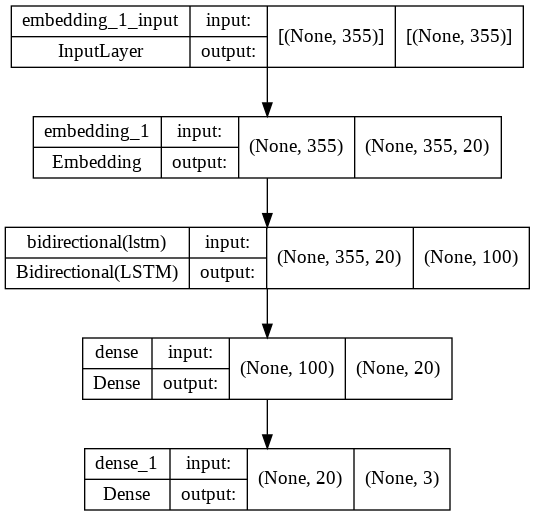

In [ ]:
tf.keras.utils.plot_model(model1, show_shapes=True)

In [ ]:
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

In this part I was fitting the model into the training data with epochs five and validation split 0.2. The epoch only set at five because it was already give a good result at the fifth epochs as it was showed in the accuracy number.

In [ ]:
history = model1.fit(x_train, y_train,epochs=5,validation_split=0.2)

Epoch 1/5
1029/1029 [==============================] - 39s 35ms/step - loss: 0.8352 - accuracy: 0.5851 - val_loss: 0.5923 - val_accuracy: 0.7806
Epoch 2/5
1029/1029 [==============================] - 37s 36ms/step - loss: 0.4212 - accuracy: 0.8523 - val_loss: 0.4371 - val_accuracy: 0.8492
Epoch 3/5
1029/1029 [==============================] - 36s 35ms/step - loss: 0.2375 - accuracy: 0.9259 - val_loss: 0.5094 - val_accuracy: 0.8309
Epoch 4/5
1029/1029 [==============================] - 36s 35ms/step - loss: 0.1514 - accuracy: 0.9527 - val_loss: 0.5213 - val_accuracy: 0.8358
Epoch 5/5
1029/1029 [==============================] - 41s 40ms/step - loss: 0.1086 - accuracy: 0.9656 - val_loss: 0.5983 - val_accuracy: 0.8222


In [ ]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Testing acc')
    plt.title('Training and Testing accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Testing loss')
    plt.title('Training and Testing loss')
    plt.legend()

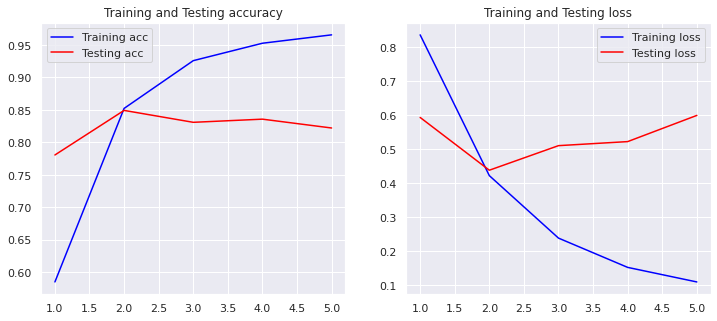

In [ ]:
plot_history(history)

- The graphs above were telling the training and testing accuracy on the left side and training and testing loss on the right side. 

- The first graph showed that training accuracy and testing accuracy was touching at the point where epoch was equal to two and the accuracy was equal to 0.85

- The Second graph informed that the blue line that represent training loss touching the red line which represented testing loss where epoch equal to 2 and the loss rate equal to 0.43

In [ ]:
model1.evaluate(x_test,y_test)

119/119 [==============================] - 2s 15ms/step - loss: 0.6427 - accuracy: 0.8146


[0.6426975727081299, 0.8146392703056335]

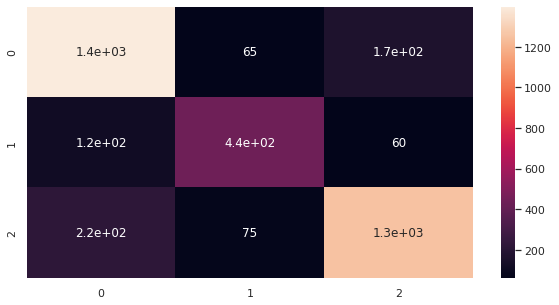

In [ ]:
pred = np.argmax(model1.predict(x_test),axis=-1)
cm = confusion_matrix(np.argmax(y_test,1),pred)
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True)

- Before we analyze more about the confusion matrix above we need to clarify that 0 represent  negative label, 1 represent neutral label, and 2 represent positive label

- When we look at the true postive for all labels it can be seen that all labels that were predicted correctly showed 14e+03 for negative label, 4.4e+02 
for neutral label, and 1.3e+03 for positive label respectively.

- Labels that were miss predicted and would become our concern was the metric in the bottom left corner. We would put our concern in that box because there were 2.2e+02 data predicetd as positive label but it appeared as negative label in actual. 

In [ ]:
print(classification_report(np.argmax(y_test,1),pred,target_names=['Negative','Neutral','Positive']))

              precision    recall  f1-score   support

    Negative       0.81      0.86      0.83      1633
     Neutral       0.76      0.71      0.73       619
    Positive       0.85      0.81      0.83      1546

    accuracy                           0.81      3798
   macro avg       0.80      0.79      0.80      3798
weighted avg       0.81      0.81      0.81      3798



- We had finally come to classification report and those numbers above were telling how did the model classify the label precisely which was represented by precision. Otherwise it was a must to see the other metric valuations to get such as good consideration before we judge the model either it was good or not.

- If we had seen the whole numbers we can easily notice that Neutral did not have good scores for precision, recall, and f1-score compared to negative label and positive label that had higher scores. 

- The shortages of this model will be noted and improved in the next model and more importantly we were trying to focus on the positive and negarive labels because both labels were contradicted and it would be giving misleading information if missclassification happened in this area.

### LSTM Model Improvement


In this part I would like to increase the model performance by set up the dropout as the hyperparameter tuning in RNNs. The dropout itself works by cencoring some of neurons that had been set up. The idea of dropout was to make each neuron get trained and become adaptive so if the new data came as inputs the neurons would still process it.

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

The code above was useful to reduce memory usage that had been used in the previous model. By running the code above it would enable the next model to run faster as if we did not run the clear session

In [ ]:
X_train.drop(columns=['TweetAt','UserName','ScreenName','Location'],axis=1,inplace=True)
X_test.drop(columns=['TweetAt','UserName','ScreenName','Location'],axis=1,inplace=True)

In [ ]:
#mapping of sentiment values
X_train.replace({'Negative':0,'Neutral':1,'Positive':2},inplace=True)
X_test.replace({'Negative':0,'Neutral':1,'Positive':2},inplace=True)

In [ ]:
X_train=train.drop_duplicates()
X_test=test.drop_duplicates()

In [ ]:
positive=X_train[X_train.Sentiment==2]['Tweet']
negative=X_train[X_train.Sentiment==0]['Tweet']
neutral=X_train[X_train.Sentiment==1]['Tweet']

In [ ]:
X_train_1=X_train['Tweet']
y_train_1=X_train['Sentiment']
X_test_1=X_test['Tweet']
y_test_1=X_test['Sentiment']

In [ ]:
#converting text to numeric using tokenizer with padding sequences to max length
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X_train_1)
vocab_length = len(tokenizer.word_index) + 1

X_train_1 = tokenizer.texts_to_sequences(X_train_1)
X_test_1 = tokenizer.texts_to_sequences(X_test_1)

X_train_1 = pad_sequences(X_train_1, maxlen=max_len, padding='post')
X_test_1 = pad_sequences(X_test_1, maxlen=max_len, padding='post')  

In model2 improvement we were adding dropout and increasing neurons in hiddin layers.

In [ ]:
#making use of bidirectional LSTM with dropout
embedding_dim=20
model2 = Sequential()
model2.add(Embedding(vocab_length,embedding_dim,input_length=max_len)) #The embedding layer
model2.add(Bidirectional(LSTM(50,dropout=0.5))) #Our LSTM layer
model2.add(Dense(32,activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(3,activation='softmax'))


model2.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 355, 20)           1703980   
                                                                 
 bidirectional (Bidirectiona  (None, 100)              28400     
 l)                                                              
                                                                 
 dense (Dense)               (None, 32)                3232      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 99        
                                                                 
Total params: 1,735,711
Trainable params: 1,735,711
Non-trainable params: 0
______________________________________________

- The model2 summary above was telling that the first layer had output shape 355, 20 which 355 was max length of the data and 20 is words embedding that had been set up. 

- In hidden layer we set up 32 as the amount of neurons in hidden layer and we also setup the dropout at 0.5. Which means 50% neurons in this layer will be cencored durning the trainng time.

- In the last layer we set up 3 neurons in outpur layer because the output we would like to get from this model is multi class classification of three classes such as sentiment postive, neutral, and negative.

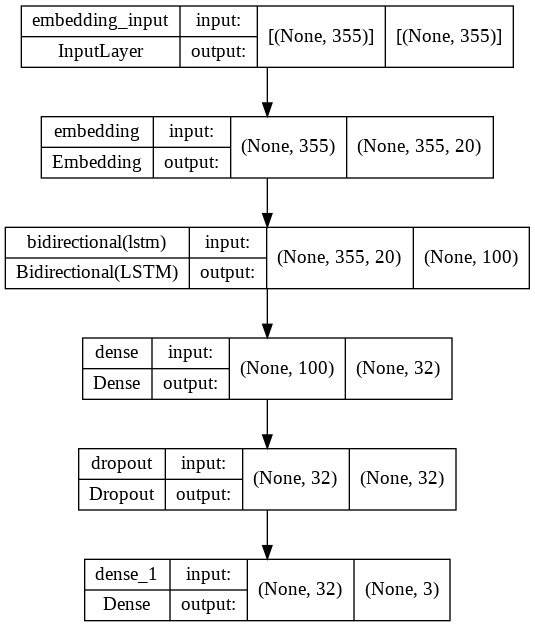

In [ ]:
tf.keras.utils.plot_model(model2, show_shapes=True)

In [ ]:
y_train_1 = to_categorical(y_train_1, 3)
y_test_1 = to_categorical(y_test_1, 3)

In [ ]:
history2 = model2.fit(X_train_1, y_train_1,epochs=5,validation_split=0.2)

Epoch 1/5
1029/1029 [==============================] - 39s 35ms/step - loss: 0.9240 - accuracy: 0.5183 - val_loss: 0.7206 - val_accuracy: 0.7000
Epoch 2/5
1029/1029 [==============================] - 36s 35ms/step - loss: 0.6351 - accuracy: 0.7582 - val_loss: 0.5098 - val_accuracy: 0.8150
Epoch 3/5
1029/1029 [==============================] - 35s 34ms/step - loss: 0.4453 - accuracy: 0.8480 - val_loss: 0.4824 - val_accuracy: 0.8275
Epoch 4/5
1029/1029 [==============================] - 35s 34ms/step - loss: 0.3378 - accuracy: 0.8923 - val_loss: 0.4912 - val_accuracy: 0.8225
Epoch 5/5
1029/1029 [==============================] - 35s 34ms/step - loss: 0.2705 - accuracy: 0.9167 - val_loss: 0.5214 - val_accuracy: 0.8318


In [ ]:
def plot_history(history2):
    acc = history2.history['accuracy']
    val_acc = history2.history['val_accuracy']
    loss = history2.history['loss']
    val_loss = history2.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Testing acc')
    plt.title('Training and Testing accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Testing loss')
    plt.title('Training and Testing loss')
    plt.legend()

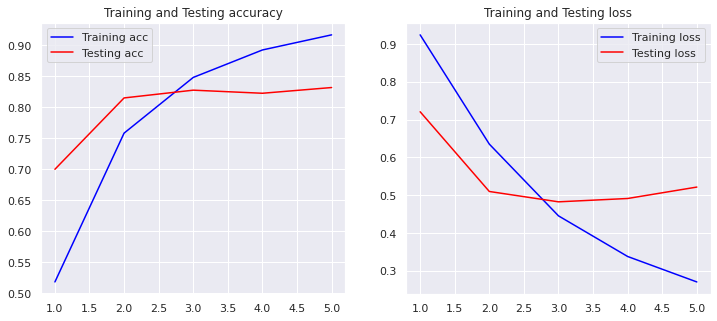

In [ ]:
plot_history(history2)

- The graph on the left side was telling that the intersection between blue and red line happened where the epoch time was 2.8 and the accuracy was around 0.85 If we compared to the previous model the intersection point in this model2 was little bit lower than in model1.


-  The graph on the right side was the telling the loss from model2 tend to go divergent after it was intersected in the point where epoch equal to 2.8 and the loss as equal to 0.5

In [ ]:
model2.evaluate(X_test_1,y_test_1)

119/119 [==============================] - 2s 14ms/step - loss: 0.5396 - accuracy: 0.8273


[0.5395963191986084, 0.8272775411605835]

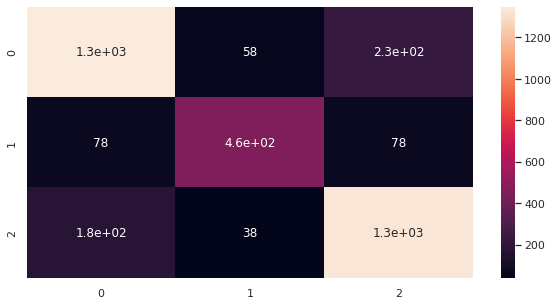

In [ ]:
pred = np.argmax(model2.predict(X_test_1),axis=-1)
cm = confusion_matrix(np.argmax(y_test_1,1),pred)
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True)

-  In the first model the box in the confusion matrix that was located on the bottom right corner had been our concern becasure it was predicted as positve sentiment but appeared as negative sentiment. When we look at the number that was written 1.8e+02 the second model sucessfully reduce this missclassification because in the previous model the missclassification number for this case was 2.2e+02 .

In [ ]:
print(classification_report(np.argmax(y_test_1,1),pred,target_names=['Negative','Neutral','Positive']))

              precision    recall  f1-score   support

    Negative       0.84      0.83      0.83      1633
     Neutral       0.83      0.75      0.79       619
    Positive       0.81      0.86      0.84      1546

    accuracy                           0.83      3798
   macro avg       0.83      0.81      0.82      3798
weighted avg       0.83      0.83      0.83      3798



From the classification report above we have seen that the accuracy increased from 0.81 in the previous model to 0.83 in the second model so this model was successfully improved LSTM model just by adding the dropout at 0.5.

### Model Deployment

In this part I froze the model to make sure the params of the model were not changing.

In [ ]:
# Freeze model
model1.trainable =  False

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 355, 20)           1703980   
                                                                 
 bidirectional (Bidirectiona  (None, 100)              28400     
 l)                                                              
                                                                 
 dense (Dense)               (None, 20)                2020      
                                                                 
 dense_1 (Dense)             (None, 3)                 63        
                                                                 
Total params: 1,734,463
Trainable params: 0
Non-trainable params: 1,734,463
_________________________________________________________________


In [ ]:
model1.save("nlp_model")

In [ ]:
model1.save('best_model.h5')
print('Best model saved')

Best model saved


In [ ]:
! zip -r nlp_model.zip nlp_model

updating: nlp_model/ (stored 0%)
updating: nlp_model/assets/ (stored 0%)
updating: nlp_model/variables/ (stored 0%)
updating: nlp_model/variables/variables.data-00000-of-00001 (deflated 21%)
updating: nlp_model/variables/variables.index (deflated 65%)
updating: nlp_model/keras_metadata.pb (deflated 90%)
updating: nlp_model/saved_model.pb (deflated 91%)


### Using The Model To Make Prediction

In [ ]:
X_test_1

array([[2298,   96, 5964, ...,    0,    0,    0],
       [  81,   19, 2039, ...,    0,    0,    0],
       [ 211,   46,   57, ...,    0,    0,    0],
       ...,
       [5211,    8, 2109, ...,    0,    0,    0],
       [ 932,   66,    2, ...,    0,    0,    0],
       [  19,    6,  854, ...,    0,    0,    0]], dtype=int32)

In [ ]:
X_new = X_test_1[:3]
y_proba = model2.predict(X_new)
y_proba.round(2)

array([[0.9 , 0.07, 0.03],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ]], dtype=float32)

In [ ]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model2.predict(X_new), axis=-1)
y_pred

array([0, 2, 2])

In [ ]:
# inference 
# siapkan data yang ingin di inference dalam bentuk list
X_test_1[:5].tolist()

[[2298,
  96,
  5964,
  7505,
  231,
  24,
  125,
  9119,
  4564,
  10,
  3956,
  619,
  46,
  56,
  2066,
  31,
  11,
  7351,
  363,
  88,
  45,
  7,
  4,
  5,
  7,
  4,
  5,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,

In [ ]:
new_data = X_test_1[:5].tolist()

In [ ]:
input_data_json = json.dumps({
    "signature_name":"serving_default",
    "instances":new_data
})

### Conclusion

- In this research we found out that the most frequent words in extremely negative label was https, panic buying, people, supermarket, and price. It was quite contradiction compared to extremely postive label whic talking about hand sanitizer, thank, and best.

- We were building two models here to see which one would suit best for this coronavirus sentiment analysis case. Based on the classification report from each model we can conclude that model2 was significantly improved to predict negative sentiment, positive sentiment, and neutral sentiment. 

- By analyzing the confusion matrix in both models we got the improvement for the negative label that was predicted positive. It was really crucial to put concern on that metric because both label were contradicted. Otherwise in general our deep learning model had successfuly tackle the problems in this research

### References

https://www.kaggle.com/code/tmchls/tweets-sentiment-analysis/notebook

https://medium.com/@harinisureshla/wordclouds-basics-of-nlp-5b60be226414

https://medium.com/@kangeugine/long-short-term-memory-lstm-concept-cb3283934359

https://machinelearningmastery.com/develop-bidirectional-lstm-sequence-classification-python-keras/